**IMPORT VARIOUS TYPES OF LIBRARIES NEEDED
1. Newspaper3k
2. Pandas
3. Numpy
4. Text Blob
5. NLTK
6. Sastrawi
7. Stop Word
8. Matplotlib
9. Word Cloud

In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install newspaper3k

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install Stopword

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import newspaper
from newspaper import Article
from newspaper import news_pool

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Duta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Duta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**USAGE OF THE NEWSPAPER3K LIBRARY AND DECLARATION OF LIPUTAN 6 NEWS URL

In [8]:
# In our process, we input a list of news URLs, where we use 2 news URLs and store them in a variable: list_url
list_url = ['https://edition.cnn.com/2023/12/16/politics/kevin-mccarthy-trump-administration/index.html',      
            'https://edition.cnn.com/2023/12/16/politics/donald-trump-republican-establishment/index.html']

In [9]:
# News scraping process that produces output such as News Title, News Author, Publication Date, and News Summary
text = []
summarize = []
for url in list_url:
  url_i = newspaper.Article(url="%s" % (url), language='id')
  url_i.download()
  url_i.parse()
  url_i.nlp()
  print('News Title         :', url_i.title)
  print('News Author        :', url_i.authors)
  print('Publication Date   :', url_i.publish_date)
  print('News Summary       :', url_i.summary)
  print('\n')
  summarize.append(url_i.summary)
  text.append(url_i.text)

News Title         : McCarthy says he’s open to serving in potential new Trump administration after House retirement
News Author        : ['Alexandra Ross']
Publication Date   : 2023-12-16 00:00:00
News Summary       : McCarthy, who is leaving Congress at the end of the year, has doubled down on his support for Trump in the 2024 presidential race, even as he has stressed that he has not endorsed anyone.
In an interview with CNN last month, McCarthy said he supported the former president, adding, “I haven’t endorsed, but I support President Trump,” he told CNN’s Manu Raju.
I will support President Trump.”CNN has reached out to McCarthy for clarification on whether he is endorsing Trump.
No,” McCarthy told Fox News on Saturday, referring to comments Trump has made about exacting revenge on his political enemies if elected.
“I believe the founders always designed this to have new blood come in,” he said.


News Title         : Analysis: Donald Trump is now the GOP establishment
News Autho

In [10]:
# Printing both news texts
text

['CNN —\n\nFormer House Speaker Kevin McCarthy said he believes former President Donald Trump will receive the 2024 Republican presidential nomination and he’ll support the former president in seeking a second term – including as a potential member of the administration.\n\n“I will help whether I’m in it or whether I’m out. I want the country to be successful. I tell the [former] president all the time, it’s about renewing, rebuilding and restoring this country,” the outgoing California Republican congressman said in an interview with Fox News on Saturday.\n\nMcCarthy, who is leaving Congress at the end of the year, has doubled down on his support for Trump in the 2024 presidential race, even as he has stressed that he has not endorsed anyone.\n\nIn an interview with CNN last month, McCarthy said he supported the former president, adding, “I haven’t endorsed, but I support President Trump,” he told CNN’s Manu Raju.\n\nWhen asked whether Trump could count on his support during an interv

In [11]:
# Printing the summary of the second text
summarize

['McCarthy, who is leaving Congress at the end of the year, has doubled down on his support for Trump in the 2024 presidential race, even as he has stressed that he has not endorsed anyone.\nIn an interview with CNN last month, McCarthy said he supported the former president, adding, “I haven’t endorsed, but I support President Trump,” he told CNN’s Manu Raju.\nI will support President Trump.”CNN has reached out to McCarthy for clarification on whether he is endorsing Trump.\nNo,” McCarthy told Fox News on Saturday, referring to comments Trump has made about exacting revenge on his political enemies if elected.\n“I believe the founders always designed this to have new blood come in,” he said.',
 'In fact, a look at the data reveals that Trump now is the establishment.\nTrump is doing considerably better in endorsements than the two most recent other GOP nominees before him (John McCain and Mitt Romney).\nThat’s notable because both men were part of the GOP establishment that tried to s

**CONVERTING A LIST INTO A STRING TEXT

In [12]:
text_news = ' '.join(map(str, text))
print(text_news)

CNN —

Former House Speaker Kevin McCarthy said he believes former President Donald Trump will receive the 2024 Republican presidential nomination and he’ll support the former president in seeking a second term – including as a potential member of the administration.

“I will help whether I’m in it or whether I’m out. I want the country to be successful. I tell the [former] president all the time, it’s about renewing, rebuilding and restoring this country,” the outgoing California Republican congressman said in an interview with Fox News on Saturday.

McCarthy, who is leaving Congress at the end of the year, has doubled down on his support for Trump in the 2024 presidential race, even as he has stressed that he has not endorsed anyone.

In an interview with CNN last month, McCarthy said he supported the former president, adding, “I haven’t endorsed, but I support President Trump,” he told CNN’s Manu Raju.

When asked whether Trump could count on his support during an interview that air

**CREATING A DATAFRAME

In [13]:
import pandas as pd
d = {'News': [text_news]}
data_news = pd.DataFrame(data=d)

data_news

,News
0,CNN —\n\nFormer House Speaker Kevin McCarthy s...


In [15]:
# Initializing the DataFrame df_news before a loop
df_news = pd.DataFrame(columns=['News Title', 'News Author', 'News', 'News Summary', 'Publication Date', 'Source'])

frames = []  # Create an empty list to store temporary DataFrames

for url in list_url:
    url_i = newspaper.Article(url="%s" % (url), language='id')
    url_i.download()
    url_i.parse()
    url_i.nlp()

    df = pd.DataFrame(columns=['News Title', 'News Author', 'News', 'News Summary', 'Publication Date', 'Source'])

    df['News Author'] = url_i.authors
    df['News Title'] = url_i.title
    df['News'] = url_i.text
    df['News Summary'] = url_i.summary
    df['Publication Date'] = url_i.publish_date
    df['Source'] = url_i.source_url

    frames.append(df)  # Add the temporary DataFrame to the 'frames' list

df_news = pd.concat(frames, ignore_index=True)  # Merge all DataFrames in the list into one DataFrame named df_news

In [16]:
df_news

,News Title,News Author,News,News Summary,Publication Date,Source
0,McCarthy says he’s open to serving in potentia...,Alexandra Ross,CNN —\n\nFormer House Speaker Kevin McCarthy s...,"McCarthy, who is leaving Congress at the end o...",2023-12-16,https://edition.cnn.com
1,Analysis: Donald Trump is now the GOP establis...,Harry Enten,CNN —\n\nWhen you think of Donald Trump’s rela...,"In fact, a look at the data reveals that Trump...",2023-12-16,https://edition.cnn.com


**UTILIZATION OF NLTK LIBRARY AND PREPROCESSING STAGES

In [17]:
import pandas as pd 
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [19]:
class preprocess:
    def low(self,data):
        return data.lower()
    def del_num(self,data):
        data = re.sub(r"\d", "", data)
        return data
    def del_punct(self,data):
        data = re.sub(r'#','', data)
        data = re.sub(r'@[A-Za-z0-9]+', '', data)
        data = re.sub(r'#','', data)
        data = re.sub(r'rt[\s]+','', data)
        data = re.sub(r'https?:\/\/\S+', '', data)
        data = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data)
        return data
    def del_ws(self,data):
        return data.strip()
    def del_stopword(self,data):
      stop_words_add = ['com','news']
      word_tokens = word_tokenize(data) 
      data = ' '.join([w for w in word_tokens if not w in stop_words_add])
      return data
    def del_stopword2(self,data):
      stop_words = set(stopwords.words('indonesian', 'english'))
      word_tokens = word_tokenize(data) 
      data = ' '.join([w for w in word_tokens if not w in stop_words])
      return data
    def stemming(self,data):
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        data = stemmer.stem(data)
    def proses_1(self,data):
        data = self.low(data)
        data = self.del_num(data)
        data = self.del_punct(data)
        data = self.del_ws(data)
        data = self.del_stopword(data)
        data = self.del_stopword2(data)
        return data   

In [20]:
df_news['News'] = df_news['News'].apply(lambda x:preprocess().proses_1(x))
df_news['News Summary'] = df_news['News Summary'].apply(lambda x:preprocess().proses_1(x))

In [21]:
df_news

,News Title,News Author,News,News Summary,Publication Date,Source
0,McCarthy says he’s open to serving in potentia...,Alexandra Ross,cnn former house speaker kevin mccarthy said h...,mccarthy who is leaving congress at the end of...,2023-12-16,https://edition.cnn.com
1,Analysis: Donald Trump is now the GOP establis...,Harry Enten,cnn when you think of donald trump s relations...,in fact a look at the data reveals that trump ...,2023-12-16,https://edition.cnn.com


**CONVERTING DATAFRAME TO A CSV FILE

In [22]:
df_news.to_csv('data_news.csv', index=False)

In [23]:
TEST_FILE_PATH  = 'data_news.csv'

In [24]:
test_df  = pd.read_csv(TEST_FILE_PATH)

In [25]:
print(f"test_df.shape: {test_df.shape}")

test_df.shape: (2, 6)


In [26]:
test_df.head()

,News Title,News Author,News,News Summary,Publication Date,Source
0,McCarthy says he’s open to serving in potentia...,Alexandra Ross,cnn former house speaker kevin mccarthy said h...,mccarthy who is leaving congress at the end of...,2023-12-16,https://edition.cnn.com
1,Analysis: Donald Trump is now the GOP establis...,Harry Enten,cnn when you think of donald trump s relations...,in fact a look at the data reveals that trump ...,2023-12-16,https://edition.cnn.com


**REMOVAL OF DATA WITH SIMILARITY OR DUPLICATES

In [27]:
test_df = test_df.drop_duplicates(subset= ['News', 'News Summary'])
test_df.shape

(2, 6)

In [28]:
test_df

,News Title,News Author,News,News Summary,Publication Date,Source
0,McCarthy says he’s open to serving in potentia...,Alexandra Ross,cnn former house speaker kevin mccarthy said h...,mccarthy who is leaving congress at the end of...,2023-12-16,https://edition.cnn.com
1,Analysis: Donald Trump is now the GOP establis...,Harry Enten,cnn when you think of donald trump s relations...,in fact a look at the data reveals that trump ...,2023-12-16,https://edition.cnn.com


**SUMMARIZATION PROCESSING

In [29]:
data_news['News'] = data_news['News'].apply(lambda x:preprocess().proses_1(x))

In [30]:
import itertools
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Duta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Duta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Duta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Duta\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Duta\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

In [31]:
# Tokenization Process
data = [word_tokenize(paragraf) for paragraf in data_news['News']]

data

[['cnn',
  'former',
  'house',
  'speaker',
  'kevin',
  'mccarthy',
  'said',
  'he',
  'believes',
  'former',
  'president',
  'donald',
  'trump',
  'will',
  'receive',
  'the',
  'republican',
  'presidential',
  'nomination',
  'and',
  'he',
  'll',
  'suppothe',
  'former',
  'president',
  'in',
  'seeking',
  'a',
  'second',
  'term',
  'including',
  'as',
  'a',
  'potential',
  'member',
  'of',
  'the',
  'administration',
  'i',
  'will',
  'help',
  'whether',
  'i',
  'm',
  'in',
  'it',
  'or',
  'whether',
  'i',
  'm',
  'out',
  'i',
  'want',
  'the',
  'country',
  'to',
  'be',
  'successful',
  'i',
  'tell',
  'the',
  'former',
  'president',
  'all',
  'the',
  'time',
  'it',
  's',
  'about',
  'renewing',
  'rebuilding',
  'and',
  'restoring',
  'this',
  'country',
  'the',
  'outgoing',
  'california',
  'republican',
  'congressman',
  'said',
  'in',
  'an',
  'interview',
  'with',
  'fox',
  'on',
  'saturday',
  'mccarthy',
  'who',
  'is',
  

In [32]:
# Process of Iterating Through Each Word Using the itertools.chain Function
data = list(itertools.chain(*data))

data

['cnn',
 'former',
 'house',
 'speaker',
 'kevin',
 'mccarthy',
 'said',
 'he',
 'believes',
 'former',
 'president',
 'donald',
 'trump',
 'will',
 'receive',
 'the',
 'republican',
 'presidential',
 'nomination',
 'and',
 'he',
 'll',
 'suppothe',
 'former',
 'president',
 'in',
 'seeking',
 'a',
 'second',
 'term',
 'including',
 'as',
 'a',
 'potential',
 'member',
 'of',
 'the',
 'administration',
 'i',
 'will',
 'help',
 'whether',
 'i',
 'm',
 'in',
 'it',
 'or',
 'whether',
 'i',
 'm',
 'out',
 'i',
 'want',
 'the',
 'country',
 'to',
 'be',
 'successful',
 'i',
 'tell',
 'the',
 'former',
 'president',
 'all',
 'the',
 'time',
 'it',
 's',
 'about',
 'renewing',
 'rebuilding',
 'and',
 'restoring',
 'this',
 'country',
 'the',
 'outgoing',
 'california',
 'republican',
 'congressman',
 'said',
 'in',
 'an',
 'interview',
 'with',
 'fox',
 'on',
 'saturday',
 'mccarthy',
 'who',
 'is',
 'leaving',
 'congress',
 'at',
 'the',
 'end',
 'of',
 'the',
 'year',
 'has',
 'doubled',
 

**FREQUENCY DISTRIBUTION

In [33]:
# The process of frequency distribution on each word using the freqdist function
fquedist = FreqDist(data)

In [34]:
# Printing the 10 most frequently used or appearing words in the news
fquedist.most_common(10)

[('the', 62),
 ('in', 35),
 ('trump', 32),
 ('and', 22),
 ('to', 21),
 ('a', 19),
 ('he', 18),
 ('of', 15),
 ('i', 14),
 ('with', 14)]

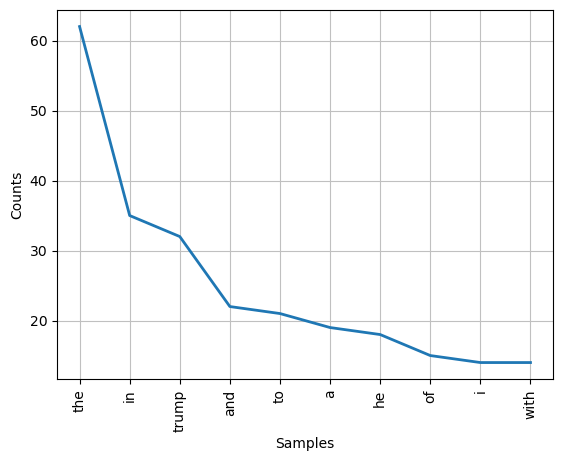

<Figure size 4000x3000 with 0 Axes>

In [35]:
fquedist.plot(10, cumulative=False)
plt.figure(figsize=(40,30))
plt.show()

In [36]:
word_frequency = FreqDist(data)
word_frequency

FreqDist({'the': 62, 'in': 35, 'trump': 32, 'and': 22, 'to': 21, 'a': 19, 'he': 18, 'of': 15, 'i': 14, 'with': 14, ...})

In [37]:
# Process of sorting word frequencies from most to least used or appearing in the news
import operator
sorted_w = dict( sorted(word_frequency.items(), key=operator.itemgetter(1),reverse=True))
print("Sorted Data :",sorted_w)

Sorted Data : {'the': 62, 'in': 35, 'trump': 32, 'and': 22, 'to': 21, 'a': 19, 'he': 18, 'of': 15, 'i': 14, 'with': 14, 'that': 14, 'has': 13, 'former': 11, 'his': 11, 's': 10, 'this': 10, 'on': 10, 'is': 10, 'mccarthy': 9, 'was': 9, 'president': 8, 'republican': 8, 'an': 8, 'cnn': 7, 'about': 7, 'establishment': 7, 'said': 6, 'at': 6, 't': 6, 'desantis': 6, 'endorsements': 6, 'whether': 5, 'it': 5, 'congress': 5, 'gop': 5, 'than': 5, 'haley': 5, 'him': 5, 'most': 5, 'will': 4, 'presidential': 4, 'all': 4, 'time': 4, 'race': 4, 'even': 4, 'not': 4, 'endorsed': 4, 'month': 4, 'but': 4, 'when': 4, 'for': 4, 'have': 4, 'just': 4, 'insurgent': 4, 'primary': 4, 'were': 4, 'bush': 4, 'million': 4, 'voters': 4, 'house': 3, 'speaker': 3, 'nomination': 3, 'as': 3, 'want': 3, 'be': 3, 'interview': 3, 'fox': 3, 'who': 3, 'last': 3, 'told': 3, 'endorsement': 3, 'revenge': 3, 'first': 3, 'from': 3, 'past': 3, 'because': 3, 'after': 3, 'members': 3, 'governors': 3, 'iowa': 3, 'these': 3, 'only': 3, 

In [38]:
maximum_frequncy = max(word_frequency.values())

for word in word_frequency.keys():
    word_frequency[word] = (word_frequency[word]/maximum_frequncy)

**EVALUATING SENTENCE SCORE (PROCESS OF ASSOCIATING A NUMERICAL VALUE BASED ON ALGORITHM PRIORITY)

In [39]:
sentence_scores = {}
for sent in data:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequency.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequency[word]
                else:
                    sentence_scores[sent] += word_frequency[word]

In [40]:
sentence_scores

{'cnn': 0.7903225806451613,
 'former': 1.951612903225807,
 'house': 0.14516129032258063,
 'speaker': 0.14516129032258063,
 'kevin': 0.06451612903225806,
 'mccarthy': 1.306451612903226,
 'said': 0.5806451612903226,
 'he': 5.225806451612903,
 'believes': 0.016129032258064516,
 'president': 1.032258064516129,
 'donald': 0.06451612903225806,
 'trump': 16.516129032258053,
 'will': 0.25806451612903225,
 'receive': 0.016129032258064516,
 'the': 62.0,
 'republican': 1.032258064516129,
 'presidential': 0.25806451612903225,
 'nomination': 0.14516129032258063,
 'and': 7.806451612903223,
 'll': 0.06451612903225806,
 'suppothe': 0.06451612903225806,
 'in': 19.758064516129043,
 'seeking': 0.016129032258064516,
 'a': 5.822580645161292,
 'second': 0.016129032258064516,
 'term': 0.016129032258064516,
 'including': 0.06451612903225806,
 'as': 0.14516129032258063,
 'potential': 0.06451612903225806,
 'member': 0.016129032258064516,
 'of': 3.629032258064518,
 'administration': 0.016129032258064516,
 'i': 3

In [41]:
import operator
sorted_d = dict(sorted(sentence_scores.items(), key=operator.itemgetter(1),reverse=True))
print("Sorted Data :",sorted_d)

Sorted Data : {'the': 62.0, 'in': 19.758064516129043, 'trump': 16.516129032258053, 'and': 7.806451612903223, 'to': 7.112903225806454, 'a': 5.822580645161292, 'he': 5.225806451612903, 'of': 3.629032258064518, 'i': 3.161290322580644, 'with': 3.161290322580644, 'that': 3.161290322580644, 'has': 2.7258064516129026, 'former': 1.951612903225807, 'his': 1.951612903225807, 's': 1.6129032258064517, 'this': 1.6129032258064517, 'on': 1.6129032258064517, 'is': 1.6129032258064517, 'mccarthy': 1.306451612903226, 'was': 1.306451612903226, 'president': 1.032258064516129, 'republican': 1.032258064516129, 'an': 1.032258064516129, 'cnn': 0.7903225806451613, 'about': 0.7903225806451613, 'establishment': 0.7903225806451613, 'said': 0.5806451612903226, 'at': 0.5806451612903226, 't': 0.5806451612903226, 'desantis': 0.5806451612903226, 'endorsements': 0.5806451612903226, 'whether': 0.4032258064516129, 'it': 0.4032258064516129, 'congress': 0.4032258064516129, 'gop': 0.4032258064516129, 'than': 0.40322580645161

**USAGE OF WORDCLOUD LIBRARY (VISUALIZING WORD DISTRIBUTION)

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [43]:
data_news = ' '.join(data)
data_news

'cnn former house speaker kevin mccarthy said he believes former president donald trump will receive the republican presidential nomination and he ll suppothe former president in seeking a second term including as a potential member of the administration i will help whether i m in it or whether i m out i want the country to be successful i tell the former president all the time it s about renewing rebuilding and restoring this country the outgoing california republican congressman said in an interview with fox on saturday mccarthy who is leaving congress at the end of the year has doubled down on his suppofor trump in the presidential race even as he has stressed that he has not endorsed anyone in an interview with cnn last month mccarthy said he supported the former president adding i haven t endorsed but i suppopresident trump he told cnn s manu raju when asked whether trump could count on his suppoduring an interview that aired last weekend on cbs sunday morning he replied yes press

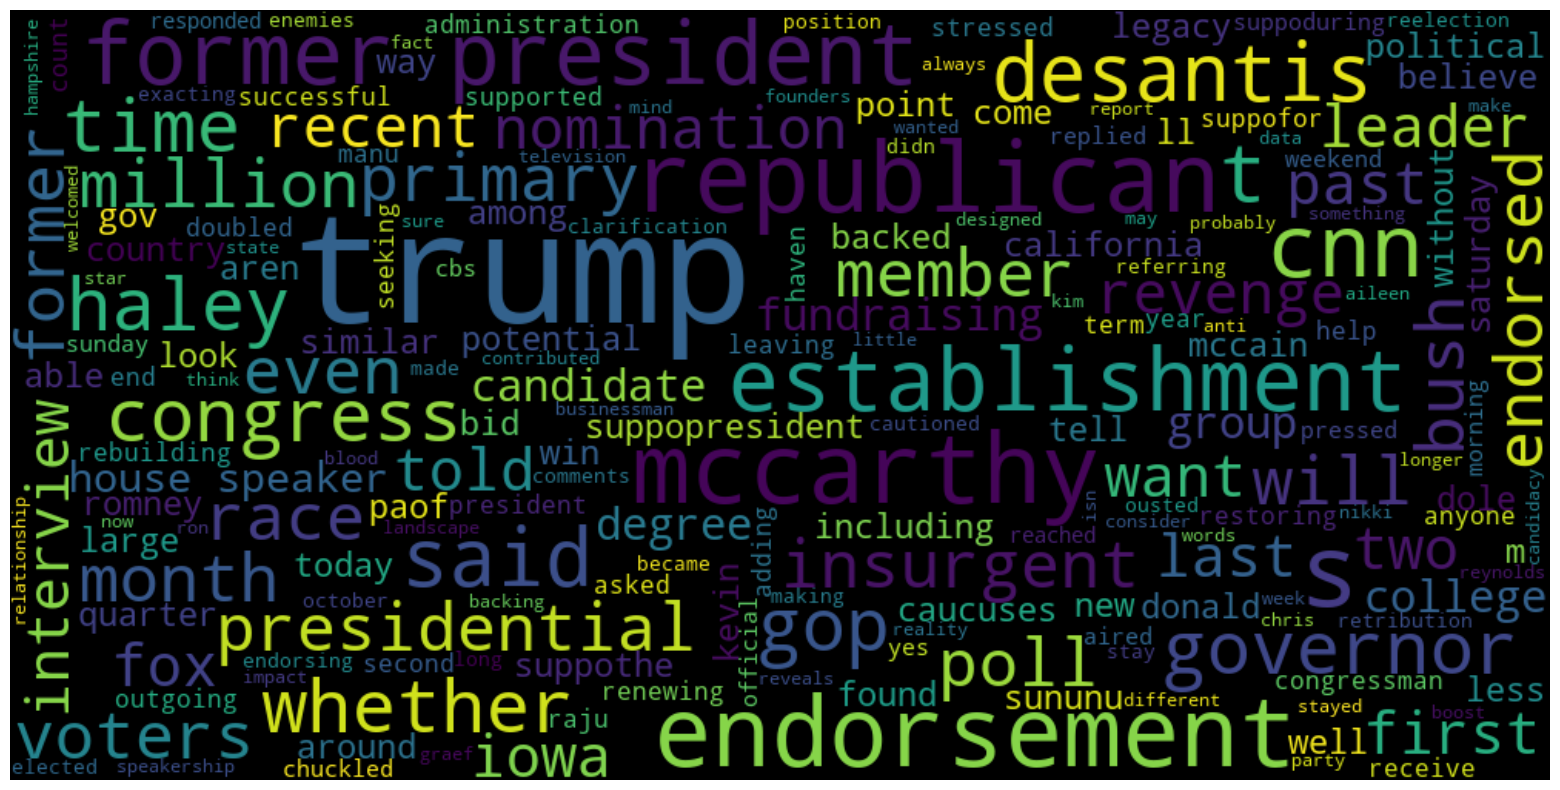

In [44]:
wordcloud = WordCloud(width=1000, height=500, max_font_size=100).generate(data_news)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()